In [4]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [3]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.5 MB/s eta 0:00:00


In [5]:
data = pd.read_csv('/content/drive/MyDrive/bayesian network/Training.csv')

In [6]:
data

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


In [10]:
data['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [11]:
Arthritis = data[data['prognosis'] == 'Arthritis']

In [12]:
Arthritis

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
350,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
351,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
352,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
353,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
354,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4750,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
4791,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
4832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN
4873,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Arthritis,NaN


In [17]:
symptoms = data.columns.to_list()

In [19]:
symptoms.remove('prognosis')

In [20]:
symptoms.remove('Unnamed: 133')

In [21]:
len(symptoms)

132

In [32]:
def calculate_conditional_probability(disease):
  disease_df = data[data['prognosis'] == disease]
  prob_disease = len(disease_df) / len(data)
  return prob_disease

probablity of each disease is same

In [31]:
for i in data['prognosis'].unique():
   print(calculate_conditional_probability(i))

120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025
120
0.024390243902439025


In [71]:
def conditional_probablities(symptom, disease):
  p1 = len(data[(data[symptom] == 1) & (data['prognosis'] == disease)]) / len(data[data['prognosis'] == disease])
  p2 = len(data[(data[symptom] == 0) & (data['prognosis'] == disease)]) / len(data[data['prognosis'] == disease])
  p3 = len(data[(data[symptom] == 1) & (data['prognosis'] != disease)]) / len(data[data['prognosis'] != disease])
  p4 = len(data[(data[symptom] == 0) & (data['prognosis'] != disease)]) / len(data[data['prognosis'] != disease])
  return [[p1,p3],[p2,p4]]

In [72]:
conditional_probablities(symptoms[0], 'Arthritis')

[[0.0, 0.14125], [1.0, 0.85875]]

In [73]:
symptoms[0]

'itching'

In [122]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [123]:
list = [(i, 'Arthritis') for i in symptoms]

In [124]:
list

[('itching', 'Arthritis'),
 ('skin_rash', 'Arthritis'),
 ('nodal_skin_eruptions', 'Arthritis'),
 ('continuous_sneezing', 'Arthritis'),
 ('shivering', 'Arthritis'),
 ('chills', 'Arthritis'),
 ('joint_pain', 'Arthritis'),
 ('stomach_pain', 'Arthritis'),
 ('acidity', 'Arthritis'),
 ('ulcers_on_tongue', 'Arthritis'),
 ('muscle_wasting', 'Arthritis'),
 ('vomiting', 'Arthritis'),
 ('burning_micturition', 'Arthritis'),
 ('spotting_ urination', 'Arthritis'),
 ('fatigue', 'Arthritis'),
 ('weight_gain', 'Arthritis'),
 ('anxiety', 'Arthritis'),
 ('cold_hands_and_feets', 'Arthritis'),
 ('mood_swings', 'Arthritis'),
 ('weight_loss', 'Arthritis'),
 ('restlessness', 'Arthritis'),
 ('lethargy', 'Arthritis'),
 ('patches_in_throat', 'Arthritis'),
 ('irregular_sugar_level', 'Arthritis'),
 ('cough', 'Arthritis'),
 ('high_fever', 'Arthritis'),
 ('sunken_eyes', 'Arthritis'),
 ('breathlessness', 'Arthritis'),
 ('sweating', 'Arthritis'),
 ('dehydration', 'Arthritis'),
 ('indigestion', 'Arthritis'),
 ('headach

In [125]:
model = BayesianNetwork(list)

In [126]:
cpd_disease = TabularCPD(variable='Arthritis', variable_card=2, values=[[0.024390243902439025],[0.975609756097561]])

In [127]:
cpd = []
cpd.append(cpd_disease)
for i in range(len(symptoms)):
  p = conditional_probablities(symptoms[i], 'Arthritis')
  print(p)
  #var = 'cpd_symptom' + str(i)
  cpd.append(TabularCPD(variable=symptoms[i], variable_card=2, values=p, evidence=['Arthritis'], evidence_card=[2]))

[[0.0, 0.14125], [1.0, 0.85875]]
[[0.0, 0.16375], [1.0, 0.83625]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.04625], [1.0, 0.95375]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.16625], [1.0, 0.83375]]
[[0.0, 0.1425], [1.0, 0.8575]]
[[0.0, 0.04625], [1.0, 0.95375]]
[[0.0, 0.04625], [1.0, 0.95375]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.39875], [1.0, 0.60125]]
[[0.0, 0.045], [1.0, 0.955]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.4025], [1.0, 0.5975]]
[[0.0, 0.02375], [1.0, 0.97625]]
[[0.0, 0.02375], [1.0, 0.97625]]
[[0.0, 0.02375], [1.0, 0.97625]]
[[0.0, 0.0475], [1.0, 0.9525]]
[[0.0, 0.095], [1.0, 0.905]]
[[0.0, 0.0475], [1.0, 0.9525]]
[[0.0, 0.095], [1.0, 0.905]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.02375], [1.0, 0.97625]]
[[0.0, 0.1175], [1.0, 0.8825]]
[[0.0, 0.28375], [1.0, 0.71625]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.09375], [1.0, 0.90625]]
[[0.0, 0.14125], [1.0, 0.85875]]
[[0.0, 0.0225], [1.0, 0.9775]]
[[0.0, 0.04625], [1.0, 0.95375]]
[[0.0, 0.23625]

In [128]:
for i in cpd:
  model.add_cpds(i)
cpd

[<TabularCPD representing P(Arthritis:2) at 0x7bdbd4e56da0>,
 <TabularCPD representing P(itching:2 | Arthritis:2) at 0x7bdbd4d11270>,
 <TabularCPD representing P(skin_rash:2 | Arthritis:2) at 0x7bdbd4d13760>,
 <TabularCPD representing P(nodal_skin_eruptions:2 | Arthritis:2) at 0x7bdbd4d10d60>,
 <TabularCPD representing P(continuous_sneezing:2 | Arthritis:2) at 0x7bdbd4d109d0>,
 <TabularCPD representing P(shivering:2 | Arthritis:2) at 0x7bdbd4d103d0>,
 <TabularCPD representing P(chills:2 | Arthritis:2) at 0x7bdbd4d10430>,
 <TabularCPD representing P(joint_pain:2 | Arthritis:2) at 0x7bdbd4d10fa0>,
 <TabularCPD representing P(stomach_pain:2 | Arthritis:2) at 0x7bdbd4d10e20>,
 <TabularCPD representing P(acidity:2 | Arthritis:2) at 0x7bdbd4d11000>,
 <TabularCPD representing P(ulcers_on_tongue:2 | Arthritis:2) at 0x7bdbd4da3fd0>,
 <TabularCPD representing P(muscle_wasting:2 | Arthritis:2) at 0x7bdbd4fd4760>,
 <TabularCPD representing P(vomiting:2 | Arthritis:2) at 0x7bdbd4d10d90>,
 <TabularC

In [130]:
import networkx as nx
import matplotlib.pyplot as plt
from pgmpy.readwrite import BIFReader


In [132]:
networkx_graph = nx.DiGraph()


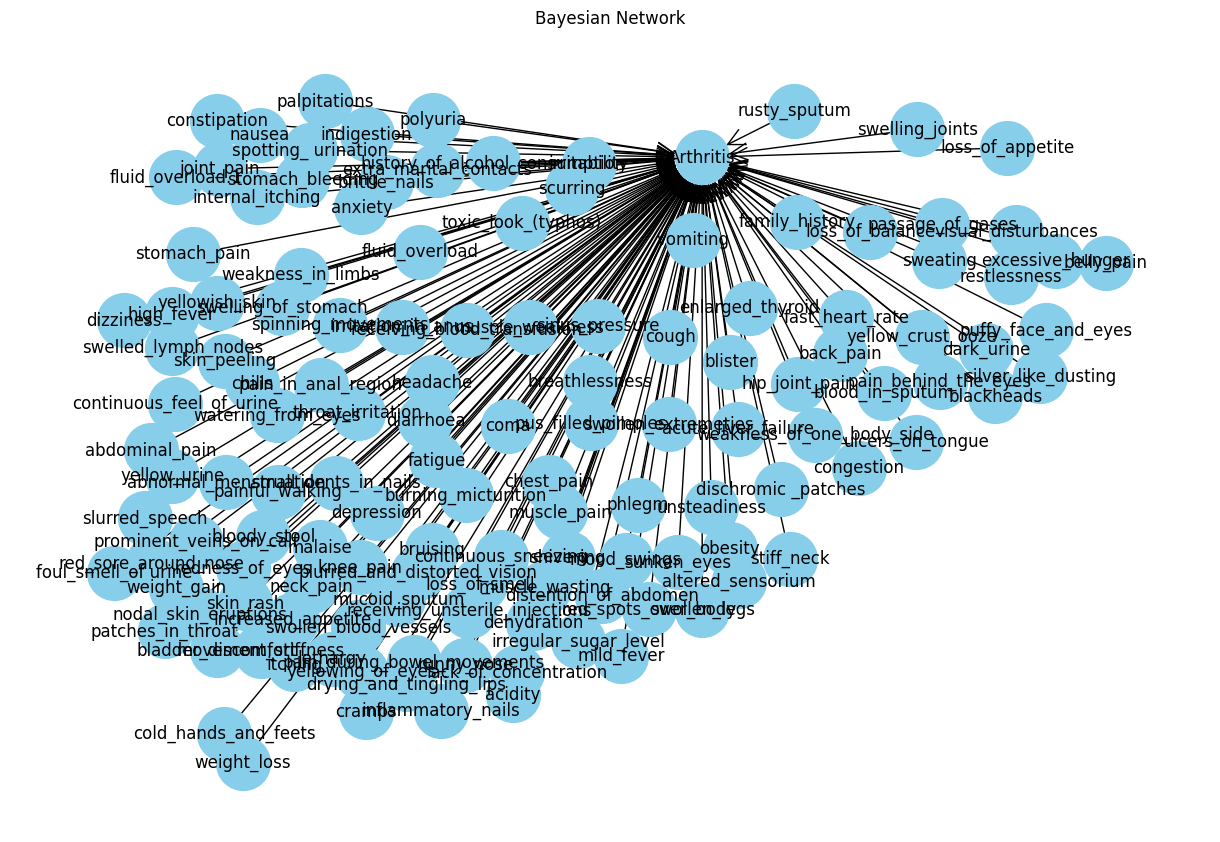

In [136]:
networkx_graph.add_nodes_from(model.nodes())

for node in model.nodes():
    parents = model.get_parents(node)
    if parents:
        for parent in parents:
            networkx_graph.add_edge(parent, node)

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(networkx_graph)
nx.draw(networkx_graph, pos, with_labels=True, node_size=1500, node_color="skyblue", arrowsize=30, arrowstyle='->')
plt.title("Bayesian Network")
plt.show()


In [135]:
inference = VariableElimination(model)
result = inference.query(variables=symptoms[0], evidence={'Arthritis': 1})
print(result)

ValueError: ignored